# Proyek Analisis Data: [E-commerce]
- **Nama:** [Qaila Casandra]
- **Email:** [mc830d5x0065@student.devacademy.id]
- **ID Dicoding:** [MC830D5X0065]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang termasuk dalam 10 besar kategori dengan jumlah penjualan terbanyak berdasarkan jumlah order selama periode data transaksi yang tersedia?
- Apa saja 10 kategori produk dengan jumlah penjualan terendah berdasarkan jumlah order selama periode data transaksi yang tersedia?
- Kota mana saja yang termasuk dalam 5 besar lokasi pengiriman dengan jumlah transaksi checkout terbanyak berdasarkan jumlah order selama periode waktu yang tersedia dalam dataset?

## Import Semua Packages/Library yang Digunakan


import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.image as mpimg
!pip install unidecode
import unidecode

In [1]:
import unidecode

## Data Wrangling

### Gathering Data

In [8]:
import pandas as pd

customers_df = pd.read_csv("D:/submission/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
import pandas as pd

geolocation_df = pd.read_csv("D:/submission/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [35]:
import pandas as pd

order_items = pd.read_csv("D:/submission/data/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [36]:
import pandas as pd

order_pay = pd.read_csv("D:/submission/data/order_payments_dataset.csv")
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [37]:
import pandas as pd

order_reviews = pd.read_csv("D:/submission/data/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [62]:
import pandas as pd

orders_df = pd.read_csv("D:/submission/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
import pandas as pd

product_cat = pd.read_csv("D:/submission/data/product_category_name_translation.csv")
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [39]:
import pandas as pd

products_df = pd.read_csv("D:/submission/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [40]:
import pandas as pd

sellers_df = pd.read_csv("D:/submission/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
## MENILAI DATA

In [26]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [41]:
geolocation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [42]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [43]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [44]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [64]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [55]:
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [56]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [57]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
## MENCARI DATA NULL

In [68]:
customers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [69]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [70]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [71]:

order_pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [72]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [73]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [74]:
product_cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [75]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [76]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
## MENCARI DUPLIKAT

In [77]:
customers_df.duplicated().sum()

np.int64(0)

In [78]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [79]:
order_items.duplicated().sum()

np.int64(0)

In [80]:
order_pay.duplicated().sum()

np.int64(0)

In [81]:
order_reviews.duplicated().sum()

np.int64(0)

In [82]:
orders_df.duplicated().sum()

np.int64(0)

In [83]:
product_cat.duplicated().sum()

np.int64(0)

In [84]:
products_df.duplicated().sum()

np.int64(0)

In [85]:
sellers_df.duplicated().sum()

np.int64(0)

In [ ]:
## DATA DESCRIBE

In [ ]:
customers_df.describe(include='all')


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [88]:
order_items.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [90]:
order_pay.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [91]:
order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [92]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [93]:
product_cat.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [94]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [95]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

berdasarkan 'Mencari Duplikat' hanya terdapat pada geolocation dataset, sehinggasaya tidak melakukan drop_duplikat

berdasarkan 'Mencari Data NULL' trdapat data yang prlu dilakukan cleansing yaitu order_reviews, orders_df, products_df

In [97]:
order_reviews[order_reviews.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [98]:
order_reviews.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [99]:
order_reviews[order_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [100]:
order_reviews.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                        230
Bom                                                                                                                              189
muito bom                                                                                                                        122
bom                                                                                                                              107
Recomendo                                                                                                                        100
                                                                                                                                ... 
para este produto recebi de acordo com a compra realizada!                                                                         1
Entregou dentro do prazo. O produto chegou em 

In [101]:
order_reviews.fillna(value="no comment", inplace=True)

In [102]:
orders_df[orders_df.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [103]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items[column] = pd.to_datetime(order_items[column])

In [105]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [106]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [107]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [108]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [109]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
customers_df.rename(columns={'seller_city': 'customer_city'}, inplace=True)


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [112]:
customers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1380,aae5e7b457a3c72ee230a47d98fceda5,83040,sao jose dos pinhas,PR
2064,b56828a9f9027f3c918c04ca720d9e3c,11707,praia grande,SP
1065,f84fa566034f5e8e880a07ec624c56af,13330,indaiatuba,SP
1515,31344c16881c08a8a72c6d2eb29918c1,36500,uba,MG
124,75745ef7bc7d4f3ea3380f6f5303f514,70384,brasilia,DF


In [113]:
customers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [121]:
print(customers_df.columns)

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


In [ ]:
ce=True)customers_df.rename(columns={'seller_id': 'customer_id'}, inpla


In [123]:
customers_df.customer_id.is_unique

True

In [124]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0       3442f8959a84dea7ee197c632cb2df15
1       d1b65fc7debc3361ea86b5f14c68d2e2
2       ce3ad9de960102d0677a81f5d0bb7b2d
3       c0f3eea2e14555b6faeea3dd58c1b1c3
4       51a04a8a6bdcb23deccc82b0b80742cf
                      ...               
3090    98dddbc4601dd4443ca174359b237166
3091    f8201cab383e484733266d1906e2fdfa
3092    74871d19219c7d518d0090283e03c137
3093    e603cf3fec55f8697c9059638d6c8eb5
3094    9e25199f6ef7e7c347120ff175652c3b
Name: customer_id, Length: 3095, dtype: object>

In [126]:
customers_df.rename(columns={'seller_city': 'customer_city'}, inplace=True)


In [127]:
gabung_df = customers_df[['customer_id', 'customer_city']]
print(gabung_df.head())

                        customer_id      customer_city
0  3442f8959a84dea7ee197c632cb2df15           campinas
1  d1b65fc7debc3361ea86b5f14c68d2e2         mogi guacu
2  ce3ad9de960102d0677a81f5d0bb7b2d     rio de janeiro
3  c0f3eea2e14555b6faeea3dd58c1b1c3          sao paulo
4  51a04a8a6bdcb23deccc82b0b80742cf  braganca paulista


In [128]:
jumlah_customer_per_kota = customers_df.groupby('customer_city')['customer_id'].nunique().reset_index()
jumlah_customer_per_kota = jumlah_customer_per_kota.sort_values(by='customer_id', ascending=False)

In [129]:
jumlah_customer_per_kota.rename(columns={'customer_id': 'jumlah_customer'}, inplace=True)

print(jumlah_customer_per_kota.head(10))

      customer_city  jumlah_customer
517       sao paulo              694
159        curitiba              127
450  rio de janeiro               96
64   belo horizonte               68
442  ribeirao preto               52
220       guarulhos               50
227        ibitinga               49
483     santo andre               45
101        campinas               41
325         maringa               40


### Explore order

In [132]:
print(order_pay.columns)

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


In [130]:
order_pay.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
77048,2b9f8967c6489ea04357a9fc58740ae5,1,credit_card,3,212.47
36853,7b5dc68850daf14f7b74396f30647f6e,2,voucher,1,51.67
34974,5b4ac3ed0dfae10196fb525f4227ccf8,1,credit_card,4,91.67
93445,063b573b88fc80e516aba87df524f809,1,credit_card,1,87.53
88648,bf6a2df6b944199274254f8bb0159ec3,1,boleto,1,78.27
33238,661e075fa45fa4a73a79dd6972bce18b,1,credit_card,8,235.71
95235,9125faac1b379b7b9ab4665189739e31,1,credit_card,4,845.51
83894,5859bf190ee8241fc9369a880297ee0e,1,boleto,1,101.30
36446,9ebce80553b159623a9ee681dc7b0c2a,1,credit_card,2,140.62
96019,62a906256e72774922d85060d98c8a5d,1,credit_card,6,68.13


In [131]:
order_pay.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [135]:
payment_counts = order_pay['payment_type'].value_counts()
print(payment_counts)


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [147]:
order_pay.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [137]:
orders_df.sample(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
35037,92cac3c69ca34e5fa1b54e0fd64de09e,cfd0cf1de6eb6298cd8d89a662a96f76,delivered,2017-03-02 09:15:28,2017-03-02 09:25:16,2017-03-08 10:43:10,2017-03-15 08:07:49,2017-03-27
4066,ba05596e1b0875fac4abdf6a6d036743,da7acf84f4943e92fe8d8c767824a994,delivered,2017-07-15 16:14:09,2017-07-15 16:25:11,2017-07-20 17:42:22,2017-08-01 19:46:53,2017-08-10
20359,eb37544121736af22008931c8e3c30c8,f282ca1cad395842df66c466afdb7192,delivered,2018-06-19 16:49:09,2018-06-19 17:26:26,2018-06-28 14:15:00,2018-07-11 18:51:38,2018-07-26
85504,c3341ac81d23f61418efcca37cff454d,255a8946290522f5dd7470c385ee3a54,delivered,2017-11-09 01:23:34,2017-11-09 03:31:16,2017-11-09 15:56:52,2017-11-21 02:16:58,2017-12-05
81067,a358ba5ce5b7dbcdcf204310f665a61d,b9cd4f6b66ba893869382d4c3aeaba1b,delivered,2017-07-14 22:26:46,2017-07-15 03:33:30,2017-07-17 17:27:52,2017-07-27 16:42:36,2017-08-07
82110,409d692c7314744b643ae98e8a11e1b5,15f254150d0e0f1fc6358514691f65bc,delivered,2018-08-14 09:27:24,2018-08-15 03:05:23,2018-08-15 16:16:00,2018-08-20 23:11:50,2018-08-31
28796,99221769ebf04d97afe0f08894b75586,cdc52f69c17d2edb73646f3834bf5488,delivered,2018-03-02 01:11:39,2018-03-03 02:51:05,2018-03-06 16:05:24,2018-03-24 18:08:34,2018-03-28


In [139]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [140]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
70030,036bbb637f99f662c928d303d461ffe1,4b4a571ee8ef4a370a0cc9402b6a5744,delivered,2018-03-20 11:52:52,2018-03-20 12:10:37,2018-03-21 19:04:21,2018-03-28 21:05:16,2018-04-09,7.0
41318,b1b02423c1a2d067772f1f5ae08361ca,28b44d183909fb96974c808633c4ef26,delivered,2018-02-22 09:13:43,2018-02-22 09:29:29,2018-02-22 21:42:09,2018-03-07 00:58:33,2018-03-15,12.0
20811,e330a36de2a3f72b1322612a178d613a,cfec5c07d9fc968c605373142960cbc8,delivered,2018-03-03 11:51:36,2018-03-03 12:09:01,2018-03-05 22:43:32,2018-03-15 21:38:37,2018-04-05,10.0
75925,f87af4a276a00d935b34c0d42c3fcfc3,15227c626cb65b59e12a8bd141e85247,delivered,2017-02-10 15:29:29,2017-02-11 15:32:29,2017-02-13 09:03:59,2017-02-17 09:06:37,2017-03-09,4.0
37203,1fed6df7b405432dd6dc44693a35b86c,0c42229f9ebb31ce346a983185d7743a,delivered,2018-07-30 12:06:23,2018-07-30 12:24:54,2018-07-30 15:17:00,2018-08-06 12:57:32,2018-08-02,7.0


<Axes: >

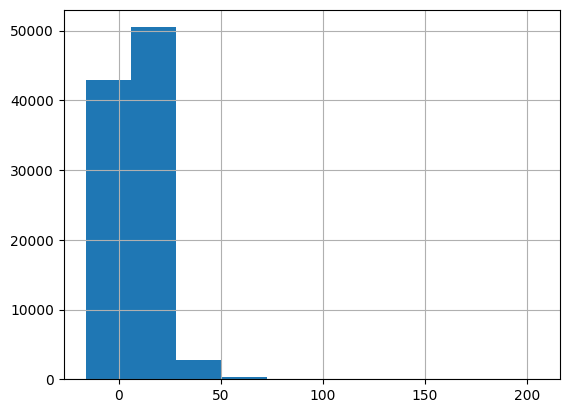

In [141]:
orders_df.delivery_time.hist()

In [150]:
customer_id_in_orders_df = orders_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,seller_zip_code_prefix,customer_city,seller_state,status
1764,f7315bb81aea4ddca2d39e249a801c98,7082,guarulhos,SP,Non Active
814,1927cdb9fa74f5270097f6250e8e8f34,17511,marilia,SP,Non Active
3068,e2c92f9c1c7746d899d18f2e158bbff7,15054,sao jose do rio preto,SP,Non Active
1194,d9e8c084b68fe958861d8f2c21202e6b,5528,sao paulo,SP,Non Active
2259,ec21206b7894c503788a684a7bc822a6,28950,armacao dos buzios,RJ,Non Active


merge customers_df with orders_df

In [144]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id")
cust_orders_df.head()

,customer_id,seller_zip_code_prefix,customer_city,seller_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN


merge order_payments with order_reviews

In [156]:

order_payrev_df = pd.merge(
    left=order_pay,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [157]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

merge order_items with seller_df

In [145]:
item_seller_df = pd.merge(
    left=order_items,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [158]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

merge product_df with product_category

In [159]:
product_df = pd.merge(
    left=products_df,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [160]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [161]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

explore geolocation_df

In [162]:
geolocation_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
488087,25620,-22.511901,-43.177707,petropolis,RJ
704056,48970,-10.451431,-40.192177,senhor do bonfim,BA
800806,74823,-16.719216,-49.263380,goiania,GO
45858,3113,-23.564034,-46.601540,sao paulo,SP
746887,62400,-2.894671,-40.848403,camocim,CE
638782,37900,-20.703086,-46.602689,passos,MG
865141,83709,-25.617818,-49.380076,araucária,PR
999995,99950,-28.072470,-52.017722,tapejara,RS
172030,6763,-23.611634,-46.759561,taboao da serra,SP
636359,37750,-21.703241,-45.900291,machado,MG


In [163]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())
     

In [165]:
geolocation_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [166]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
1200        1
1189        1
1290        1
1262        1
39523       1
Length: 19015, dtype: int64

Merge all data

In [6]:
folder_path = r'D:\submission\data'


In [13]:
import os
orders_df = pd.read_csv(os.path.join(folder_path, 'orders_dataset.csv'))
customers_df = pd.read_csv(os.path.join(folder_path, 'customers_dataset.csv'))
order_items = pd.read_csv(os.path.join(folder_path, 'order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(folder_path, 'order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(folder_path, 'order_reviews_dataset.csv'))
products_df = pd.read_csv(os.path.join(folder_path, 'products_dataset.csv'))
sellers_df = pd.read_csv(os.path.join(folder_path, 'sellers_dataset.csv'))
product_cat = pd.read_csv(os.path.join(folder_path, 'product_category_name_translation.csv'))

In [14]:
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, order_items, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_payments, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_reviews, on='order_id', how='left')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='left')
merged_df = pd.merge(merged_df, sellers_df, on='seller_id', how='left')
merged_df = pd.merge(merged_df, product_cat, on='product_category_name', how='left')


In [ ]:
merged_df.columns = merged_df.columns.str.strip()

In [ ]:
output_path = os.path.join(folder_path, 'merged_all_data.csv')
merged_df.to_csv(output_path, index=False)

In [ ]:
print(merged_df.head())
print(merged_df.columns)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa saja yang termasuk dalam 10 besar kategori dengan jumlah penjualan terbanyak berdasarkan jumlah order selama periode data transaksi yang tersedia?

In [184]:

product_sales = pd.merge(order_items, products_df[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales = pd.merge(product_sales, product_cat[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')
category_sales = product_sales.groupby('product_category_name_english')['order_id'].count().reset_index()
category_sales = category_sales.sort_values(by='order_id', ascending=False)
top_10_categories = category_sales.head(10)
print(top_10_categories)


   product_category_name_english  order_id
7                 bed_bath_table     11115
43                 health_beauty      9670
65                sports_leisure      8641
39               furniture_decor      8334
15         computers_accessories      7827
49                    housewares      6964
70                 watches_gifts      5991
68                     telephony      4545
42                  garden_tools      4347
5                           auto      4235


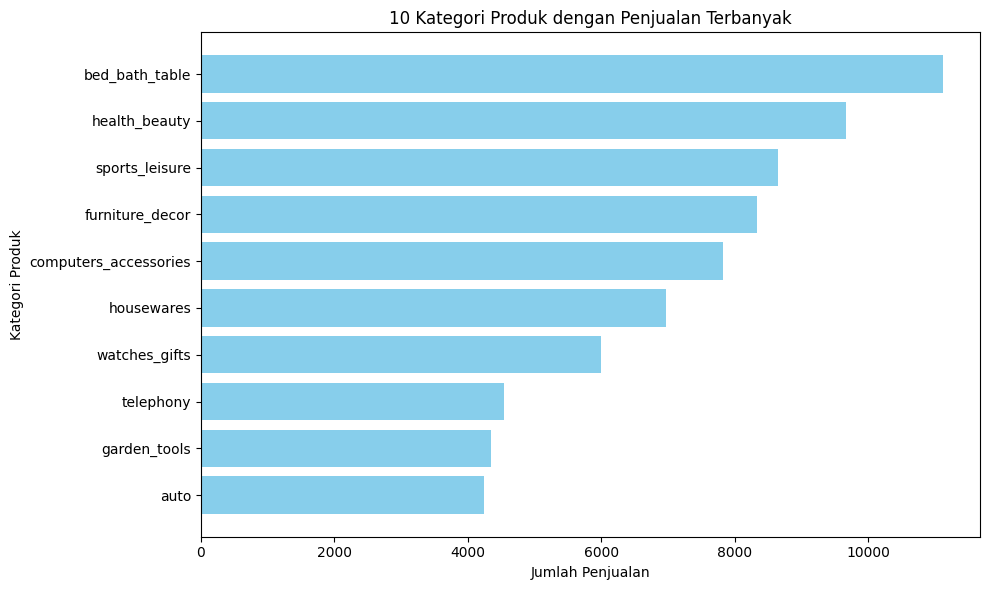

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_10_categories['product_category_name_english'], top_10_categories['order_id'], color='skyblue')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk dengan Penjualan Terbanyak')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa saja 10 kategori produk dengan jumlah penjualan terendah berdasarkan jumlah order selama periode data transaksi yang tersedia?

In [182]:
product_sales = pd.merge(order_items, products_df[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales = pd.merge(product_sales, product_cat[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')
category_sales = product_sales.groupby('product_category_name_english')['order_id'].count().reset_index()
category_sales = category_sales.sort_values(by='order_id', ascending=True)
bottom_10_categories = category_sales.head(10)
print(bottom_10_categories)


        product_category_name_english  order_id
61              security_and_services         2
29          fashion_childrens_clothes         8
52                         la_cuisine        14
11                  cds_dvds_musicals        14
3               arts_and_craftmanship        24
32                      fashion_sport        30
46                     home_comfort_2        30
35                            flowers        33
55                              music        38
41  furniture_mattress_and_upholstery        38


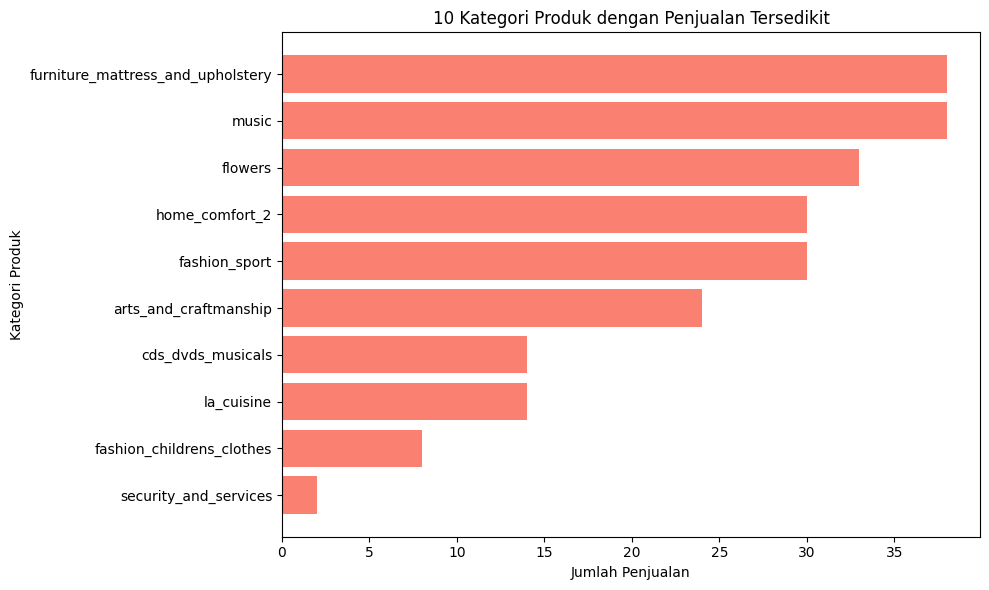

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(bottom_10_categories['product_category_name_english'], bottom_10_categories['order_id'], color='salmon')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk dengan Penjualan Tersedikit')
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Kota mana saja yang termasuk dalam 5 besar lokasi pengiriman dengan jumlah transaksi checkout terbanyak berdasarkan jumlah order selama periode waktu yang tersedia dalam dataset?

In [186]:
orders_per_city = pd.merge(orders_df, customers_df[['customer_id', 'customer_city']], on='customer_id', how='left')
city_order_count = orders_per_city.groupby('customer_city')['order_id'].nunique().reset_index()
city_order_count = city_order_count.sort_values(by='order_id', ascending=False)
top_5_cities = city_order_count.head(5)
print(top_5_cities)


       customer_city  order_id
3597       sao paulo     15540
3155  rio de janeiro      6882
453   belo horizonte      2773
558         brasilia      2131
1143        curitiba      1521


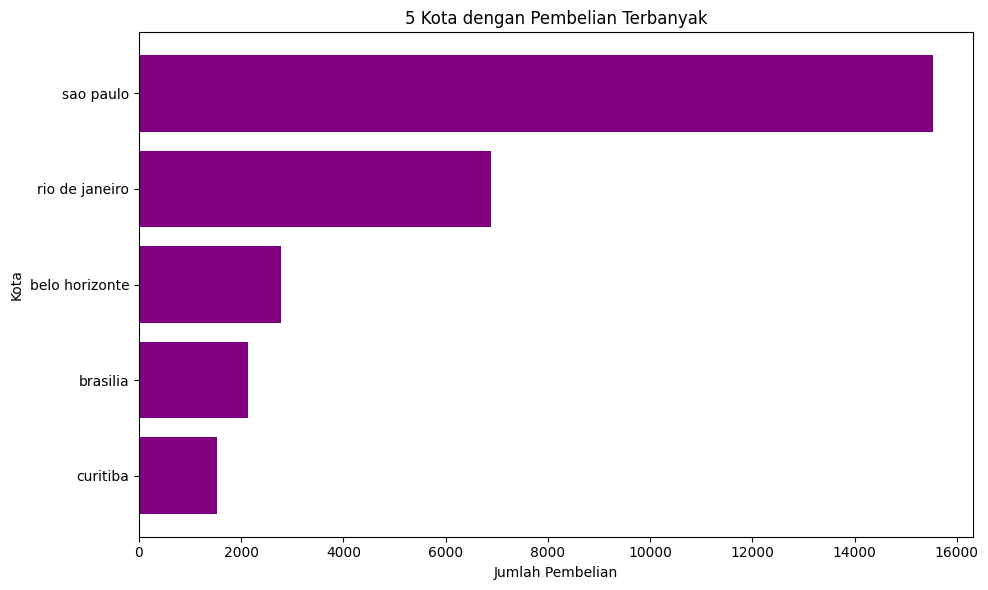

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_5_cities['customer_city'], top_5_cities['order_id'], color='purple')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kota')
plt.title('5 Kota dengan Pembelian Terbanyak')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1 dari hasil analisa yang telah dilakukan,  ada 10 kategori produk yang paling sering dibeli konsumen. Artinya, kategori ini punya demand paling tinggi yaitu :

    bed_bath_table

    health_beauty

    sport_leisure

    furniture_decor

    computer_accessories

    housewares

    watches_gifts

    telephony

    garden_tools

    auto
    berdasarkan hasil tersebut, perusahaan dapat memproduksi lebih banyak produk-produk seperti bed bath table, health beauty dan sport leisure. Selain itu produk-produk tersebut dapat dimasukan kedalam katalog utama, sehingga para pembeli akan terus melakukan pembelian produk-produk tersebut pada toko kita.


- Conclution pertanyaan 2 Sebaliknya, terdapat produk-produk yang ternyata kurang menarik buat dibeli oleh konsumen. adapun 10 kategori dengan order paling sedikit:

    furniture_mattress_and_upholstery

    music

    flowers

    home_comfort_2

    fashion_sport

    arts_and_craftmanship

    cds_dvds_musicals

    la_cuisine

    fashion_childrens_clothes

    security_and_service

Yang paling sepi peminat adalah security_and_service. Kemungkinan karena emang jarang dibutuhkan atau kurang relevan buat pembeli e-commerce. Kategori kayak music dan cds_dvds_musicals juga mulai ditinggal, mungkin karena sekarang orang lebih banyak streaming dibanding beli fisik. Mungkin perusahaan dapat mengadakan promo untuk barang - barang tersebut seperti diskon, buy something free produk2 tersebut, bundle dengan produk yang paling laku, menaruh di etalase paling depan dan melakukan acara flash sale/cuci gudang

- Conclution pertanyaan 3 ada beberapa kota yang jadi “raja belanja” di dataset ini. Paling tinggi yaitu São Paulo, disusul beberapa kota besar lainnya.
Top 5 kota dengan order terbanyak:

    São Paulo

    Rio de Janeiro

    Belo Horizonte

    Brasília

    Curitiba
sao paulo merupakan kota metropolitan, sehingga merupakan hal yang wajar apabila kota tersebut menjadi kota dengan checkout terbanyak. Perusahaan dapat mengambil insight ini sebagai masukan untuk tetap mempertahankan kinerjanya, serta membangun pusat logistik. perusahaan juga bisa menerapkan pengiriman same day setelah dibangunnya warehouse di kota yang dipilih.

In [1]:
pip install streamlit


In [5]:
import streamlit as st

st.title('Dashboard e-commerce')

2025-03-10 12:15:23.822 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 12:15:25.186 
  command:

    streamlit run c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-10 12:15:25.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()